In [105]:
from pathlib import Path
from typing import Tuple
import torch
from torch import Tensor
from sbi.utils.metrics import c2st
from tqdm  import tqdm

project_root = Path.cwd().parent.parent


def load_samples(path: Path) -> Tuple[Tensor, Tensor, float]:
    print(path)
    dfs = []
    for file in path.glob("*.pt"):
        content = torch.load(file)
        print(content["x_o"].shape)
        print(content["theta"].shape)


load_samples(project_root / "gbi_results" / "two_moons" / "specified_known")

/home/robin/projects/lab_project/neuralgbi_diffusion/gbi_results/two_moons/specified_known
torch.Size([10, 2])
torch.Size([1000, 10, 2])
torch.Size([10, 2])
torch.Size([1000, 10, 2])
torch.Size([10, 2])
torch.Size([1000, 10, 2])


/tmp/ipykernel_191152/60431847.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  content = torch.load(file)


Text(0.5, 0.98, 'Two Moons - MSE')

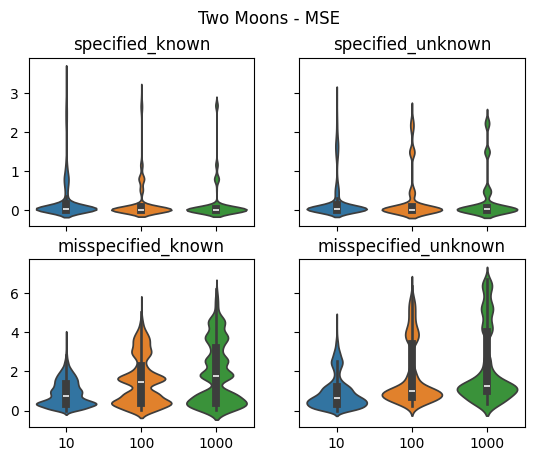

In [106]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns

def compute_mse_score(path: Path):
    content = torch.load(path, weights_only=True)
    theta = content["theta"]
    x_0 = content["x_o"]
    beta = content["beta"]

    entity = path.parent.stem
    simulator_name = path.parent.parent.stem
    gt_path = project_root / "data" / "gbi_data" / entity / (simulator_name + "_10.pt")
    gt = torch.load(gt_path, weights_only=True)
    
    gt_theta = gt["_theta"]
    diff = torch.square((theta - gt_theta[None])).mean(dim=2).flatten()
    return diff, beta


fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey="row")


files = list((project_root / "gbi_results" / "two_moons" / "specified_known").glob("*.pt"))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

df = DataFrame(diffs.detach().numpy().T, columns=betas.detach().numpy())
sns.violinplot(df, ax=axs[0, 0])
axs[0, 0].set_title("specified_known")

files = list((project_root / "gbi_results" / "two_moons" / "specified_unknown").glob("*.pt"))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

df = DataFrame(diffs.detach().numpy().T, columns=betas.detach().numpy())
sns.violinplot(df, ax=axs[0, 1])
axs[0, 1].set_title("specified_unknown")


files = list((project_root / "gbi_results" / "two_moons" / "misspecified_known").glob("*.pt"))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

df = DataFrame(diffs.detach().numpy().T, columns=betas.detach().numpy())
sns.violinplot(df, ax=axs[1, 0])
axs[1, 0].set_title("misspecified_known")



files = list((project_root / "gbi_results" / "two_moons" / "misspecified_unknown").glob("*.pt"))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

df = DataFrame(diffs.detach().numpy().T, columns=betas.detach().numpy())
sns.violinplot(df, ax=axs[1, 1])
axs[1, 1].set_title("misspecified_unknown")

fig.suptitle("Two Moons - MSE")

Text(0.5, 0.98, 'Two Moons - MSE')

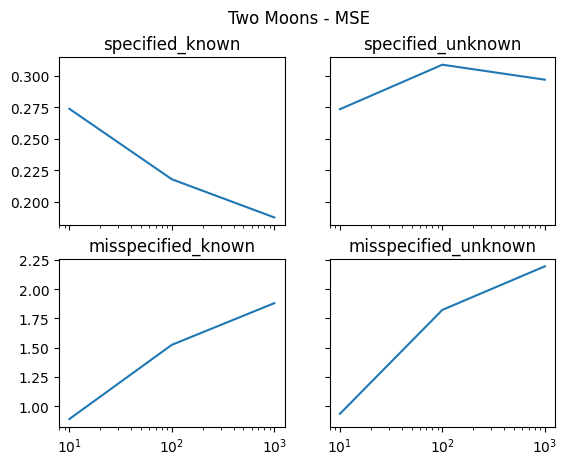

In [107]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns

def compute_mse_score(path: Path):
    content = torch.load(path, weights_only=True)
    theta = content["theta"]
    x_0 = content["x_o"]
    beta = content["beta"]

    entity = path.parent.stem
    simulator_name = path.parent.parent.stem
    gt_path = project_root / "data" / "gbi_data" / entity / (simulator_name + "_10.pt")
    gt = torch.load(gt_path, weights_only=True)
    
    gt_theta = gt["_theta"]
    diff = torch.square((theta - gt_theta[None])).mean(dim=2).flatten()
    return diff, beta


fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey="row")


files = sorted(list((project_root / "gbi_results" / "two_moons" / "specified_known").glob("*.pt")))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

axs[0, 0].plot(betas.detach().numpy(), diffs.mean(dim=1).detach().numpy())
axs[0, 0].set_title("specified_known")
axs[0, 0].set_xscale("log")
files = sorted(list((project_root / "gbi_results" / "two_moons" / "specified_unknown").glob("*.pt")))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

axs[0, 1].plot(betas.detach().numpy(), diffs.mean(dim=1).detach().numpy())
axs[0, 1].set_title("specified_unknown")
axs[0, 1].set_xscale("log")


files = sorted(list((project_root / "gbi_results" / "two_moons" / "misspecified_known").glob("*.pt")))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

axs[1, 0].plot(betas.detach().numpy(), diffs.mean(dim=1).detach().numpy())
axs[1, 0].set_title("misspecified_known")
axs[1, 0].set_xscale("log")


files = sorted(list((project_root / "gbi_results" / "two_moons" / "misspecified_unknown").glob("*.pt")))
diffs = []
betas = []
for file in files:
    diff, beta = compute_mse_score(file)
    diffs.append(diff)
    betas.append(beta)
diffs = torch.stack(diffs)
betas = torch.tensor(betas)
keys = ["mse", "beta"]

axs[1, 1].plot(betas.detach().numpy(), diffs.mean(dim=1).detach().numpy())
axs[1, 1].set_xscale("log")
axs[1, 1].set_title("misspecified_unknown")

fig.suptitle("Two Moons - MSE")

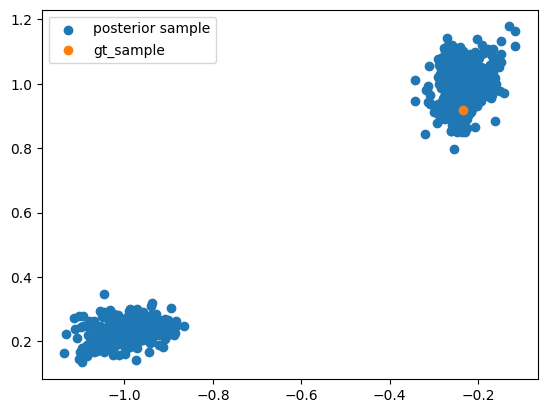

In [136]:
def show_posterior(path: Path, idx: int):
    content = torch.load(path, weights_only=True)
    theta = content["theta"]
    x_0 = content["x_o"]
    beta = content["beta"]

    entity = path.parent.stem
    simulator_name = path.parent.parent.stem
    gt_path = project_root / "dat       a" / "gbi_data" / entity / (simulator_name + "_10.pt")
    gt = torch.load(gt_path, weights_only=True)
    
    gt_theta = gt["_theta"]
    
    plt.scatter(*theta[:, idx].detach().numpy().T, label="posterior sample")
    plt.scatter(*gt_theta[idx].detach().numpy(), label="gt_sample")
    plt.legend()

files = sorted(list((project_root / "gbi_results" / "two_moons" / "specified_known").glob("*.pt")))
show_posterior(files[-2], 1)